<a href="https://colab.research.google.com/github/MohamedTolba1199/Tensorflow/blob/main/Tensorflow_Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow V.2

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x1=tf.constant(5)
x2=tf.constant(10)

res=tf.add(x1,x2)
res

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [3]:
res.numpy()

15

#make add,subtract,multiplication,divide using tensorflow

In [4]:
v1 = tf.constant([1, 2 ,3 ,4])
v2 = tf.constant([6, 7 ,8 ,9])

Add = tf.add(v1,v2)
Sub = tf.subtract(v1,v2)
Mul = tf.multiply(v1,v2)
Div = tf.divide(v1,v2)

In [5]:
print(Add.numpy())
print(Sub.numpy())
print(Mul.numpy())
print(Div.numpy())

[ 7  9 11 13]
[-5 -5 -5 -5]
[ 6 14 24 36]
[0.16666667 0.28571429 0.375      0.44444444]


In [6]:
print(v1+v2)
print(v1-v2)
print(v1*v2)
print(v1/v2)

tf.Tensor([ 7  9 11 13], shape=(4,), dtype=int32)
tf.Tensor([-5 -5 -5 -5], shape=(4,), dtype=int32)
tf.Tensor([ 6 14 24 36], shape=(4,), dtype=int32)
tf.Tensor([0.16666667 0.28571429 0.375      0.44444444], shape=(4,), dtype=float64)


#Linear regression using tensorflow v2

In [7]:
data=pd.read_csv('Fuel consumption 2019.csv')
data.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,261


In [8]:
data.columns

Index(['Model-Year', 'Make', 'Model', 'Vehicle-Class', 'Engine-Size',
       'Cylinders', 'Transmission', 'Fuel-Type', 'Fuel-Consumption-City',
       'Fuel-Consumption-Hwy', 'Fuel-Consumption-Comb', 'CO2-Emissions'],
      dtype='object')

In [9]:
X_d=data.loc[:,'Engine-Size'].values
y_d=data.loc[:,'CO2-Emissions'].values

In [10]:
X=tf.constant(X_d,dtype='float32')
y=tf.constant(y_d,dtype='float32')

w=tf.Variable(2.0,dtype='float32')
b=tf.Variable(7.2,dtype='float32')


In [11]:
def H(X):
    Y_P=w*X+b
    return Y_P

In [12]:
def cost_function(y_actual,y_pred):
    mse=tf.reduce_mean(tf.square(y_actual-y_pred))#  1\m sum (y_a-y_pr)^2
    return mse

In [13]:
#train

lr=0.01
epochs=100
losses_values=[]
w_values=[]
b_values=[]

for epoch in range(epochs):
    with tf.GradientTape() as tape:

        #feedforward
        y_pred=H(X)

        #backward
        loss=cost_function(y,y_pred)
        losses_values.append(loss)

        #update weights
        gradients=tape.gradient(loss,[w,b]) #derivative-->[dl/dw ,dl/db]

        #w=w-lr*grad
        w.assign_sub(lr*gradients[0]) #w.assign_sub ---> w1=w0 - ...
        b.assign_sub(lr*gradients[1]) #b.assign_sub ---> b1=b0 - ...

        w_values.append(w.numpy())
        b_values.append(b.numpy())

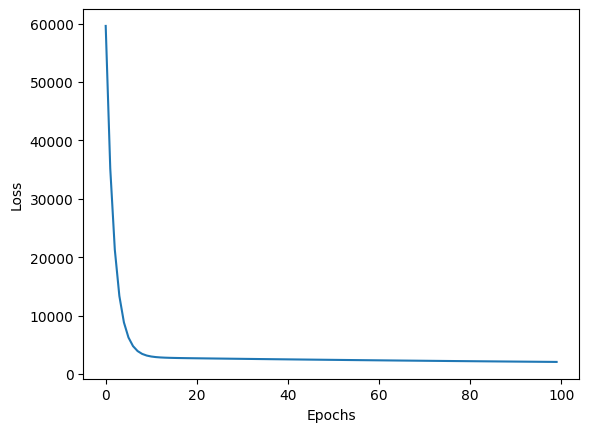

In [14]:
plt.plot(losses_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

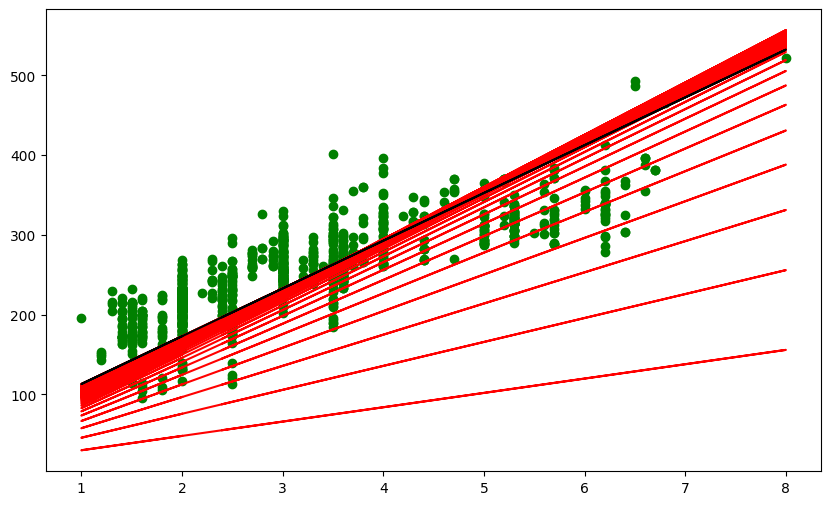

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,c='g')

for w_ , b_  in zip(w_values , b_values):

  y_pred=w_*X.numpy()+b_
  plt.plot(X,y_pred,color='red')

#final prediction (best fitting)
y_final_pred=w_values[-1] *  X.numpy()  + b_values[-1]
plt.plot(X,y_final_pred,color='black')